# Customer Churn Prediction with Decision Trees and Random Forests 

In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import joblib

In [3]:
X_train = pd.read_csv("X_train_scaled.csv")
X_test = pd.read_csv("X_test_scaled.csv")

y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

y_train = y_train.squeeze().to_numpy()
y_test = y_test.squeeze().to_numpy()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 40)
(1407, 40)
(5625,)
(1407,)


## Single Decision Tree

In [5]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {accuracy}")

Initial Accuracy: 0.7213930348258707


In [6]:
parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_model, parameter_grid, cv=5, scoring="accuracy", n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.5f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Score: 0.79591


In [7]:
best_model = grid_search.best_estimator_

bm_test_pred = best_model.predict(X_test)

bm_test_accuracy = accuracy_score(y_test, bm_test_pred)

print(f"Test data prediction accuracy of the best DT model: {bm_test_accuracy}")

Test data prediction accuracy of the best DT model: 0.7732764747690121


In [8]:
print("\nClassification Report (Best Model):")
print(classification_report(y_test, bm_test_pred))


Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.57      0.60      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.78      1407



In [9]:
print("\nConfusion Matrix (Best Model):")
print(confusion_matrix(y_test, bm_test_pred))


Confusion Matrix (Best Model):
[[864 169]
 [150 224]]


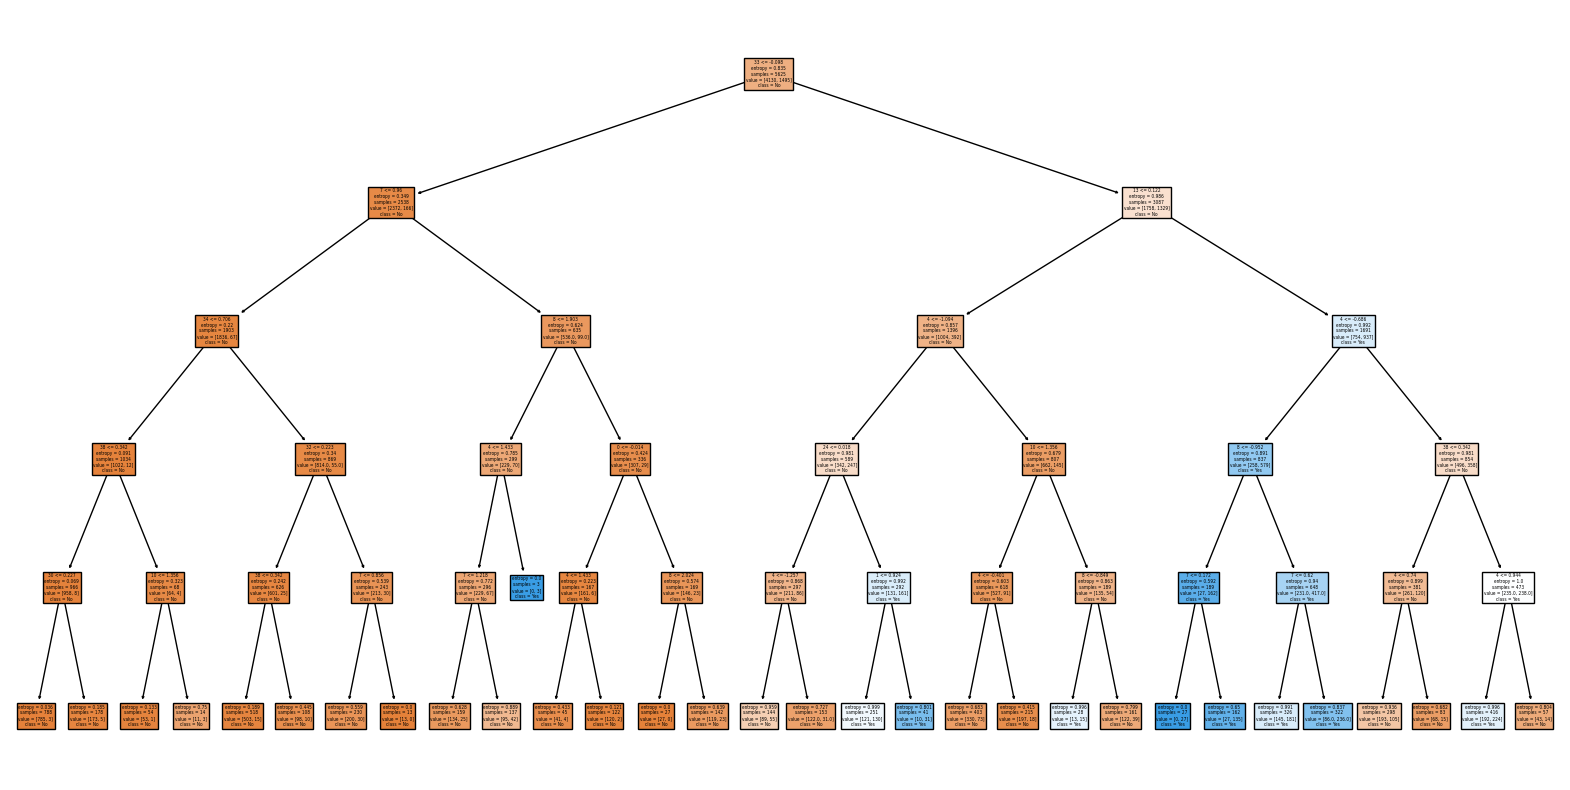

In [10]:
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'])
plt.show()

## Random Forests

In [12]:
y_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

test_acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Default model accuracy: {test_acc_rf}")

Default model accuracy: 0.7853589196872779


In [14]:
parameter_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [5, 10, 20, None],   
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]     
}

grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=parameter_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.5f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.80587


In [15]:
best_rf_model = grid_search.best_estimator_

y_pred_bestrf = best_rf_model.predict(X_test)

bestrf_acc = accuracy_score(y_test, y_pred_bestrf)

print(f"Test Set Accuracy for Best RF Model: {bestrf_acc:.5f}")

Test Set Accuracy for Best RF Model: 0.79318


In [16]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bestrf))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [17]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bestrf))


Confusion Matrix:
[[929 104]
 [187 187]]


In [18]:
joblib.dump(best_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [19]:
joblib.dump(best_rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']